<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Visualize-Singular-Vectors-&amp;-Properties" data-toc-modified-id="Visualize-Singular-Vectors-&amp;-Properties-1">Visualize Singular Vectors &amp; Properties</a></span></li><li><span><a href="#Visualize-SVD-/-EVD-Equivalence" data-toc-modified-id="Visualize-SVD-/-EVD-Equivalence-2">Visualize SVD / EVD Equivalence</a></span></li><li><span><a href="#Visualize-SVD-Component-Operations" data-toc-modified-id="Visualize-SVD-Component-Operations-3">Visualize SVD Component Operations</a></span></li><li><span><a href="#Psuedo-Inverse" data-toc-modified-id="Psuedo-Inverse-4">Psuedo Inverse</a></span></li><li><span><a href="#Data-Compression-and-Reconstruction" data-toc-modified-id="Data-Compression-and-Reconstruction-5">Data Compression and Reconstruction</a></span></li><li><span><a href="#SVD-for-data-imputation" data-toc-modified-id="SVD-for-data-imputation-6">SVD for data imputation</a></span></li><li><span><a href="#Relationship-to-PCA" data-toc-modified-id="Relationship-to-PCA-7">Relationship to PCA</a></span></li></ul></div>

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
PRECISION = 3

def svd(X):
    """Returns the Singular Value Decomposition of X (via numpy),
    returned in matrix format
    """
    U, s, Vt = np.linalg.svd(X)
    
    # Put the vector singular values into a padded matrix
    S = np.zeros(X.shape)
    np.fill_diagonal(S, s)
    
    # Rounding for display
    return np.round(U, PRECISION), np.round(S, PRECISION), np.round(Vt.T, PRECISION)

In [3]:
from matplotlib import pyplot as plt
plt.rcParams['image.cmap'] = 'RdBu_r'

def visualize_svd(m, n, fig_height=5):
    """Plot the Singular Value Decomposition of a random matrix of size `m x n`
    
    Parameters
    ----------
    m : int
        The number of rows in the random matrix
    n : int
        The number of columns
    fig_height : float
        Fiddle parameter to make figures render better (because I'm lazy and don't
        want to work out the scaling arithmetic).
    """
    np.random.seed(123)

    M = np.random.randn(m, n)
    U, S, V = svd(M)
    
    fig, axs = plt.subplots(1, 7, figsize=(12, fig_height))

    plt.sca(axs[0])
    plt.imshow(M)
    plt.title(f'$M \in \mathbb{{R}}^{{{{{m}}} \\times {{{n}}}}}$', fontsize=14)

    plt.sca(axs[1])
    plt.text(.25, .25, '=', fontsize=48)
    plt.axis('off')

    plt.sca(axs[2])
    plt.imshow(U)
    plt.title(f'$U \in \mathbb{{R}}^{{{{{m}}} \\times {{{m}}}}}$', fontsize=14)

    plt.sca(axs[3])
    plt.text(.25, .25, '$\\times$', fontsize=48)
    plt.axis('off')

    plt.sca(axs[4])
    plt.imshow(S)
    plt.title(f'$S \in \mathbb{{R}}^{{{{{m}}} \\times {{{n}}}}}$')

    plt.sca(axs[5])
    plt.text(0.25, .25, '$\\times$', fontsize=48)
    plt.axis('off')

    plt.sca(axs[6])
    cmap = plt.imshow(V.T)
    plt.colorbar(cmap, ax=axs, orientation='horizontal', aspect=50)
    plt.title(f'$V^T \in \mathbb{{R}}^{{{{{n}}} \\times {{{n}}}}}$', fontsize=14)

    plt.suptitle(f'SVD Components $m={{{m}}}, n={{{n}}}$', fontsize=18)
    
    fname = f'/tmp/svd-{m}x{n}.png'
    plt.savefig(fname, bbox_inches='tight', dpi=300)
    print(fname)

$$
X_{m \times n} = U_{m \times m} S_{m \times n} V^T_{n \times n}
$$

Substituting symbol R from STIXGeneral
Substituting symbol R from STIXGeneral
Substituting symbol R from STIXGeneral
Substituting symbol R from STIXGeneral
Substituting symbol R from STIXGeneral
Substituting symbol R from STIXGeneral
Substituting symbol R from STIXGeneral
Substituting symbol R from STIXGeneral
Substituting symbol R from STIXGeneral
Substituting symbol R from STIXGeneral
Substituting symbol R from STIXGeneral
Substituting symbol R from STIXGeneral


/tmp/svd-4x4.png


Substituting symbol R from STIXGeneral
Substituting symbol R from STIXGeneral
Substituting symbol R from STIXGeneral
Substituting symbol R from STIXGeneral


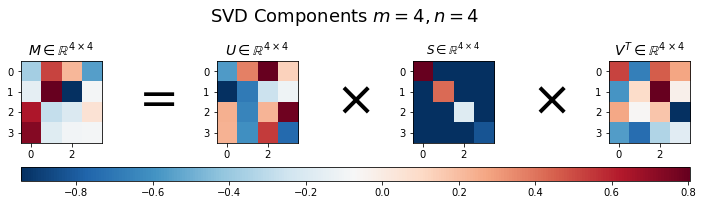

In [4]:
visualize_svd(4, 4, fig_height=3)

Substituting symbol R from STIXGeneral
Substituting symbol R from STIXGeneral
Substituting symbol R from STIXGeneral
Substituting symbol R from STIXGeneral
Substituting symbol R from STIXGeneral
Substituting symbol R from STIXGeneral
Substituting symbol R from STIXGeneral
Substituting symbol R from STIXGeneral
Substituting symbol R from STIXGeneral
Substituting symbol R from STIXGeneral
Substituting symbol R from STIXGeneral
Substituting symbol R from STIXGeneral


/tmp/svd-8x4.png


Substituting symbol R from STIXGeneral
Substituting symbol R from STIXGeneral
Substituting symbol R from STIXGeneral
Substituting symbol R from STIXGeneral


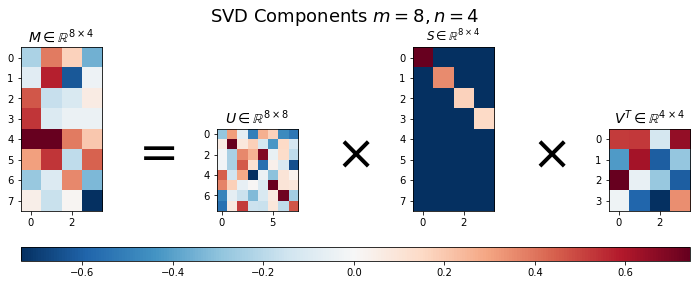

In [5]:
visualize_svd(8, 4, 4.5)

Substituting symbol R from STIXGeneral
Substituting symbol R from STIXGeneral
Substituting symbol R from STIXGeneral
Substituting symbol R from STIXGeneral
Substituting symbol R from STIXGeneral
Substituting symbol R from STIXGeneral
Substituting symbol R from STIXGeneral
Substituting symbol R from STIXGeneral
Substituting symbol R from STIXGeneral
Substituting symbol R from STIXGeneral
Substituting symbol R from STIXGeneral
Substituting symbol R from STIXGeneral


/tmp/svd-4x8.png


Substituting symbol R from STIXGeneral
Substituting symbol R from STIXGeneral
Substituting symbol R from STIXGeneral
Substituting symbol R from STIXGeneral


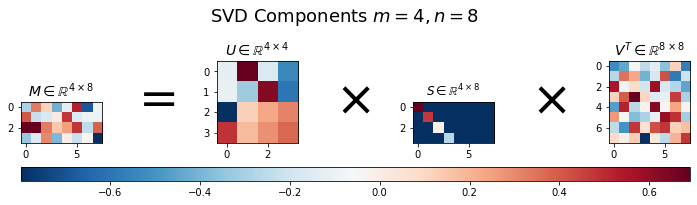

In [6]:
visualize_svd(4, 8, 3)

## Visualize Singular Vectors & Properties

Substituting symbol R from STIXGeneral
Substituting symbol R from STIXGeneral
Substituting symbol R from STIXGeneral
Substituting symbol R from STIXGeneral
Substituting symbol R from STIXGeneral
Substituting symbol R from STIXGeneral
Substituting symbol R from STIXGeneral
Substituting symbol R from STIXGeneral


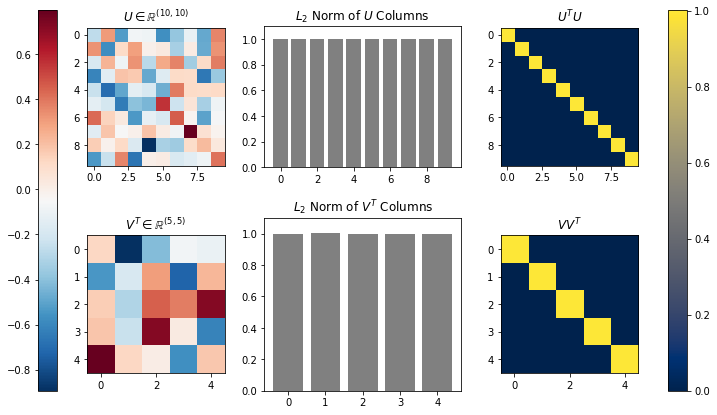

In [8]:
# Generate random m x n matrix, X

def matrix_column_l2_norm(M):
    """Returns the L2 norm of each column of matrix M, """
    return (M ** 2).sum(0)

m = 10
n = 5
np.random.seed(123)
M = np.random.randn(m, n)

# Run the SVD
U, S, V = svd(M)

# Calculate L2 norm of U and V^T
U_norm = matrix_column_l2_norm(U)
V_norm = matrix_column_l2_norm(V.T)

# Visualizations
fig, axs = plt.subplots(2, 3, figsize=(12, 7))

## Matrix U
plt.sca(axs[0][0])
plt.imshow(U, interpolation='nearest')
plt.title(f'$U \in \mathbb{{R}}^{{{U.shape}}}$')

## L2 norm of U's columns
plt.sca(axs[0][1])
plt.gca().set_aspect(7.)
plt.bar(range(m), U_norm, facecolor='gray')
plt.ylim([0, 1.1])
plt.title('$L_2$ Norm of $U$ Columns')

## U^TU is a Identity Matrix
plt.sca(axs[0][2])
plt.imshow(U.T @ U, cmap='cividis', interpolation='nearest')
plt.title('$U^TU$')

## Matrix V
plt.sca(axs[1][0])
cax1 = plt.imshow(V.T, interpolation='nearest')
plt.title(f'$V^T \in \mathbb{{R}}^{{{V.shape}}}$')

## L2 norm of V^T's columns
plt.sca(axs[1][1])
plt.bar(range(n), V_norm, facecolor='gray')
plt.ylim([0, 1.1])
plt.title('$L_2$ Norm of $V^T$ Columns')

## VV^T is a Identity Matrix
plt.sca(axs[1][2])
cax2 = plt.imshow(V @ V.T, cmap='cividis', interpolation='nearest')
plt.title('$VV^T$')

## Set Colorbars
fig.colorbar(cax1, ax=[axs[0][0], axs[1][0]], location='left', pad=0.15)
fig.colorbar(cax2, ax=[axs[0][2], axs[1][2]], location='right', pad=0.15)

plt.savefig('/tmp/svd-u-v-properties.png', bbox_inches='tight', dpi=300)

## Visualize SVD / EVD Equivalence

$ X^TX = (USV^T)^T USV^T \\ 
= V S^T U^T  U S V^T \\ 
= V S^T I S V^T \\ 
= V S^T  S V^T$


$ XX^T =  USV^T (USV^T)^T \\
= U S V^T  V S^T U^T \\
= U S I S^T U^T \\
= U S S^T U^T$

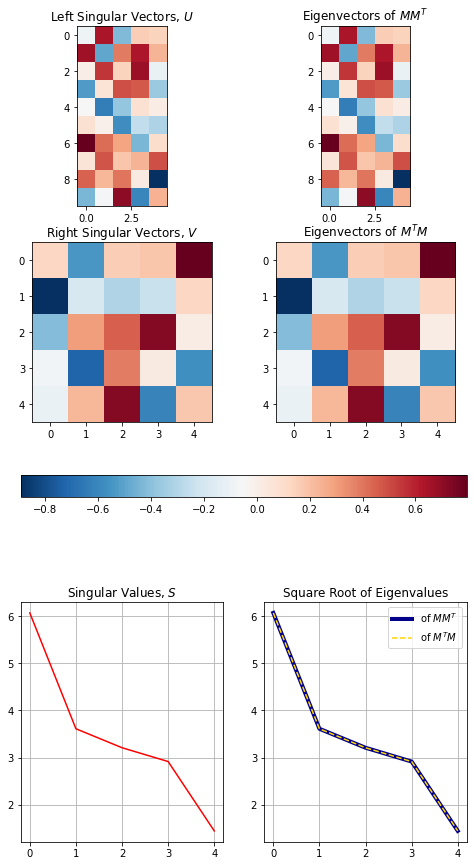

In [10]:
def evd(M):
    """Returns the Eigenvalue Decomposition of M (via numpy), with eigenvectors
    sorted by descending eigenvalues
    """
    def sort_eigs(evals, evecs):
        sort_idx = np.argsort(evals)[::-1]
        evals_sorted = np.round(np.real(evals[sort_idx]), PRECISION)
        evecs_sorted = np.round(np.real(evecs[:, sort_idx]), PRECISION)
        return evals_sorted, evecs_sorted

    return sort_eigs(*np.linalg.eig(M))

def align_eigen_vectors(E, M):
    """Eigenvector solutions are not unique, so check sign to give consistent results with SVD
    """
    for dim in range(E.shape[1]):
        if np.sign(M[0, dim]) != np.sign(E[0, dim]):
            E[:, dim] = E[:, dim] * -1
    return E

def matrix_column_l2_norm(M):
    """Returns the L2 norm of each column of matrix M, """
    return (M ** 2).sum(0)

eigen_values_MtM, eigen_vectors_MtM = evd(M.T @ M)
eigen_values_MMt, eigen_vectors_MMt = evd(M @ M.T)

fig, axs = plt.subplots(3, 2, figsize=(8, 15))
plt.sca(axs[0][0])
# M isn't symmetric, so we only show results up to the smallest dimension, n
cax = plt.imshow(U[:,:n])
plt.title("Left Singular Vectors, $U$")

plt.sca(axs[0][1])
plt.imshow(align_eigen_vectors(eigen_vectors_MMt[:,:n], U[:,:n]))
plt.title("Eigenvectors of $MM^T$")

plt.sca(axs[1][0])
cax = plt.imshow(V)
plt.title("Right Singular Vectors, $V$")

plt.sca(axs[1][1])
plt.imshow(align_eigen_vectors(eigen_vectors_MtM, V))
plt.title("Eigenvectors of $M^TM$")
fig.colorbar(cax, ax=axs[:2], orientation='horizontal', pad=0.1);

plt.sca(axs[2][0])
plt.plot(np.diag(S), color='red')
plt.grid()
plt.title('Singular Values, $S$')

plt.sca(axs[2][1])
plt.plot(eigen_values_MMt[:n] ** .5, c='darkblue', linewidth=4, label='of $MM^T$')
plt.plot(eigen_values_MtM[:n] ** .5, '--', c='gold', label='of $M^TM$')
plt.grid()
plt.title('Square Root of Eigenvalues')
plt.legend()

plt.savefig('/tmp/svd-eigen-decomposition-equivalence.png', bbox_inches='tight', dpi=300)

## Visualize SVD Component Operations

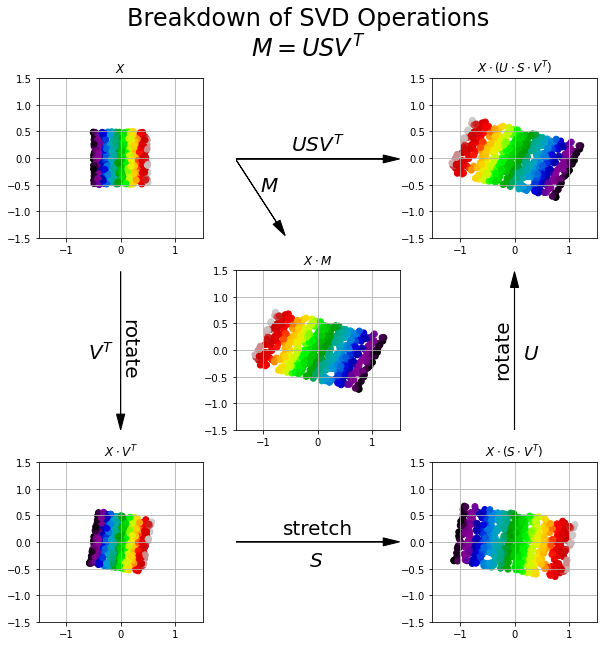

In [11]:
# Generate andom observations matrix (uniform distribution)
np.random.seed(123)  # Repeatability
n_observations = 500
n_dim = 2

X = np.random.rand(n_observations, n_dim) - .5

# Transformation Matrix
M = np.array(
    [
        [-2., .5],
        [-.5, -1]
    ]
)

colors = X[:, 0]
cmap = 'nipy_spectral'

# SVD of Transformation Matrix
U, S, V = svd(M)

# Visualization
fig, axs = plt.subplots(3, 3, figsize=(10, 10))
plt.suptitle('Breakdown of SVD Operations\n$M = U  S  V^T$', fontsize=24, ha='center')

## Data
### Original X
plt.sca(axs[0][0])
plt.scatter(X[:, 0], X[:, 1], c=colors, cmap=cmap)
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
plt.grid()
plt.title("$X$")

### X * M (matrix transformation)
XM = X @ M
plt.sca(axs[1][1])
plt.scatter(XM[:, 0], XM[:, 1], c=colors, cmap=cmap)
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
plt.grid()
plt.title("$X \cdot M$")

### X * V' (rotate)
XVt = X @ V.T
plt.sca(axs[2][0])
plt.scatter(XVt[:, 0], XVt[:, 1], c=colors, cmap=cmap)
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
plt.grid()
plt.title("$X \cdot V^T$")

### X * (S * V') (rotate and scale)
XSVt = X @ (S @ V.T)
plt.sca(axs[2][2])
plt.scatter(XSVt[:, 0], XSVt[:, 1], c=colors, cmap=cmap)
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
plt.grid()
plt.title("$X \cdot (S \cdot V^T)$")

### X * (U * S * V') (rotate, scale, and rotate)
XUSVt = X @ (U @ S @ V.T)
plt.sca(axs[0][2])
plt.scatter(XUSVt[:, 0], XUSVt[:, 1], c=colors, cmap=cmap)
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
plt.grid()
plt.title("$X \cdot (U \cdot S \cdot V^T)$")

## Operations/Arrows
### M
plt.sca(axs[0][1])
plt.arrow(.0, .5, .9, 0., capstyle='round', head_width=0.05, head_length=0.1, fc='black')
plt.arrow(.0, .5, .25, -.4, capstyle='round', head_width=0.05, head_length=0.1, fc='black')
plt.text(.15, .3, '$M$', fontsize=20)
plt.text(.5, .55, '$USV^T$', fontsize=20, ha='center')
plt.xlim([0., 1.])
plt.ylim([0., 1.01])
plt.axis('off')

### V'
plt.sca(axs[1][0])
plt.arrow(.5, 1., 0, -.9, capstyle='round', head_width=0.05, head_length=0.1, fc='black')
plt.text(.3, .45, '$V^T$', fontsize=20)
plt.text(.55, .35, 'rotate', fontsize=20, ha='center', rotation=-90)
plt.xlim([0., 1.])
plt.ylim([0., 1.01])
plt.axis('off')

### S
plt.sca(axs[2][1])
plt.arrow(.0, .5, .9, 0., capstyle='round', head_width=0.05, head_length=0.1, fc='black')
plt.text(.45, .35, '$S$', fontsize=20)
plt.text(.5, .55, 'stretch', fontsize=20, ha='center')
plt.xlim([0., 1.])
plt.ylim([0., 1.])
plt.axis('off')

### U
plt.sca(axs[1][2])
plt.arrow(.5, 0., 0, .9, capstyle='round', head_width=0.05, head_length=0.1, fc='black')
# plt.arrow(.5, 0., 0, .9, capstyle='round', fc='black')
plt.text(.55, .45, '$U$', fontsize=20)
plt.text(.43, .35, 'rotate', fontsize=20, ha='center', rotation=90)
plt.xlim([0., 1.])
plt.ylim([0., 1.01])
plt.axis('off')


plt.savefig('/tmp/svd-operations.png', bbox_inches='tight', dpi=300)


## Psuedo Inverse

In [12]:
np.linalg.inv(M)

array([[-0.44444444, -0.22222222],
       [ 0.22222222, -0.88888889]])

In [18]:
def pseudo_inverse_via_svd(X):
    def diagonal_pseudo_inverse(D):
        """Replaces the nonzero entries of diagonal matrix D with their reciprocal"""
        diags = np.diag(D)
        pinverse = np.zeros_like(D)
        np.fill_diagonal(pinverse, diags ** -1.)
        return pinverse.T  # non-square singular values align with U.T
    U, S, V = svd(X)
    return V @ diagonal_pseudo_inverse(S) @ U.T

print(np.linalg.inv(M))

print(pseudo_inverse_via_svd(M))

[[-0.44444444 -0.22222222]
 [ 0.22222222 -0.88888889]]
[[-0.44444364 -0.22197355]
 [ 0.22197355 -0.88887214]]


In [19]:
M_non_square = np.random.randn(4, 2)
PRECISION = 6
try:
    np.linalg.inv(M_non_square)
except Exception as e:
    print("Non-square matrices have no inverse...", e)
finally:
    print("\n...but they do have a pseudo-inverse, which we can calculate via SVD:")
    print(pseudo_inverse_via_svd(M_non_square))

print("\nNumpy pseudo-inverse provides similar results:\n", np.linalg.pinv(M_non_square))

Non-square matrices have no inverse... Last 2 dimensions of the array must be square

...but they do have a pseudo-inverse, which we can calculate via SVD:
[[-0.13836761  0.70853959 -0.5504225  -0.4265854 ]
 [-0.1482406  -0.10021696 -0.08299649 -0.36686834]]

Numpy pseudo-inverse provides similar results:
 [[-0.13836806  0.7085401  -0.55042271 -0.42658598]
 [-0.14824084 -0.10021714 -0.08299636 -0.3668684 ]]


In [20]:
np.linalg.norm(np.linalg.pinv(M_non_square)) * np.linalg.norm(M_non_square)

3.030123256603139

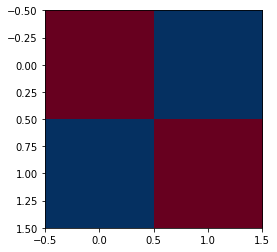

In [21]:
plt.imshow(np.linalg.inv(M).dot(M))

In [22]:
beta = np.random.rand(5)
X = np.random.randn(10, 5)
y = X @ beta 

print(beta)
print(pseudo_inverse_via_svd(X) @ y)
print(np.linalg.inv((X.T @ X)) @ X.T @ y)

[0.57220384 0.10487129 0.64997129 0.34369768 0.18292129]
[0.57220315 0.10487124 0.64997153 0.34369793 0.18292127]
[0.57220384 0.10487129 0.64997129 0.34369768 0.18292129]


## Data Compression and Reconstruction

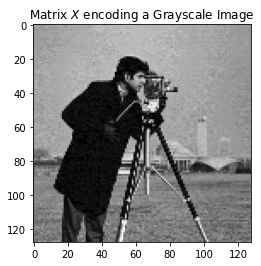

In [23]:
img = plt.imread("../assets/images/svd/cameraman.png")

# Donwsample and convert to RGBa image to float matrix
DOWNSAMPLE = 4
R = img[::DOWNSAMPLE, ::DOWNSAMPLE, 0]
G = img[::DOWNSAMPLE, ::DOWNSAMPLE, 1]
B = img[::DOWNSAMPLE, ::DOWNSAMPLE, 2]
X_img = 0.2989 * R + 0.5870 * G + 0.1140 * B

plt.imshow(X_img, cmap='gray')
plt.title("Matrix $X$ encoding a Grayscale Image")

plt.savefig('/tmp/X-as-cameraman-image.png', bbox_inches='tight', dpi=300)

D=4 - Data Requirement: 6.27% of original
D=8 - Data Requirement: 12.55% of original
D=16 - Data Requirement: 25.1% of original
D=32 - Data Requirement: 50.2% of original
D=64 - Data Requirement: 100.39% of original


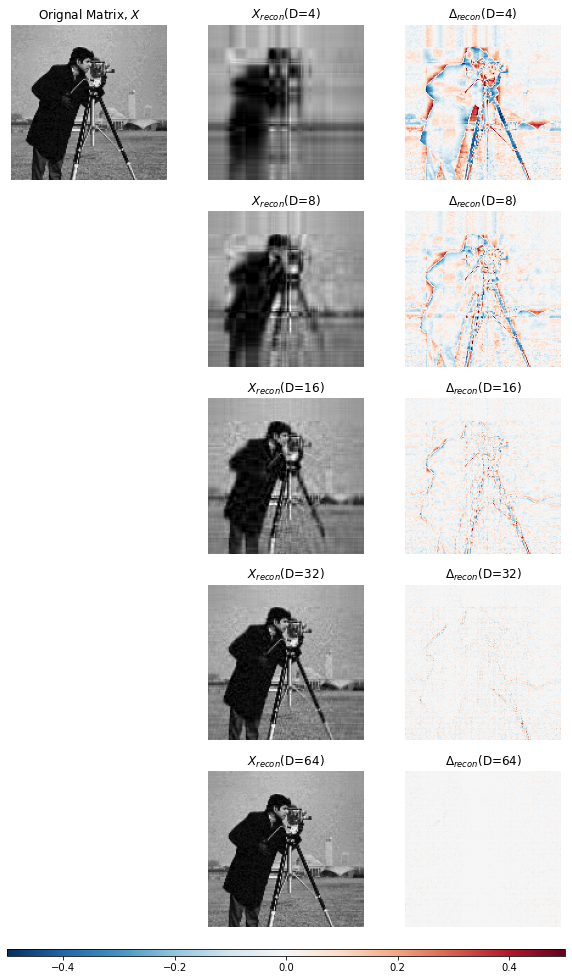

In [24]:
U_img, S_img, V_img = np.linalg.svd(X_img)

N = 5

fig, axs = plt.subplots(N, 3, figsize=(10, 20))
plt.sca(axs[0][0])
plt.imshow(X_img, cmap='gray')
plt.clim([0, 1.])
plt.axis('off')
plt.title("Orignal Matrix, $X$")

for power in range(1, N + 1):
    n_dim = 2 ** (1 + power)
    
    if power > 1:
        plt.sca(axs[power-1][0])
        plt.cla()
        plt.axis('off')

    X_reconstruction = U_img[:, :n_dim] * S_img[:n_dim] @ V_img[:n_dim,:]
    # Calculate number of floats required to store compressed image
    data_size = 100 * (np.prod(U_img[:, :n_dim].shape) + np.prod(S_img[:n_dim].shape) + np.prod(V_img[:n_dim,:].shape)) / np.prod(X_img.shape) 
    print(f'D={n_dim} - Data Requirement: {round(data_size, 2)}% of original')

    plt.sca(axs[power-1][1])
    plt.imshow(X_reconstruction, cmap='gray')
    plt.clim([0, 1.])
    plt.axis('off')
    plt.title(f'$X_{{recon}}$(D={n_dim})')
    
    plt.sca(axs[power-1][2])
    cax = plt.imshow(X_img - X_reconstruction)
    plt.clim([-.5, .5])
    plt.axis('off')
    plt.title(f'$\Delta_{{recon}}$(D={n_dim})')

fig.colorbar(cax, ax=axs, aspect=80, pad=.02, orientation='horizontal')
plt.savefig('/tmp/svd-reconstruction.png', bbox_inches='tight', dpi=300)

## SVD for data imputation
Troyanskaya, O., Cantor, M., Sherlock, G., Brown, P., Hastie, T., Tibshirani, R., Botstein, D. and Altman, R.B. (2001). Missing value estimation methods for DNA microarrays. Bioinformatics 17(6), 520--525.

set RSS := $\infty$

while RSS > tol:
- impute using zero or column mean
- calculate SVD on inmputed data
- reconstruct data using K components
- Calculate RSS on reconstruction


/Users/dustinstansbury/.local/share/virtualenvs/notebooks-I_qBHKH9/lib/python3.7/site-packages/ipykernel_launcher.py:32: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("RdBu_r"))


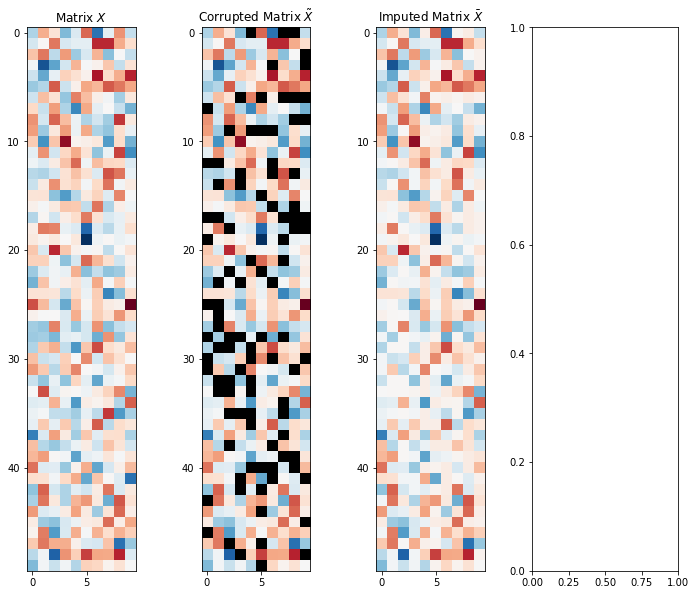

In [25]:
import pandas as pd
from sklearn.impute import SimpleImputer

np.random.seed(123)
n_obs = 50
n_dim = 10
X_orig = pd.DataFrame(np.random.randn(n_obs, n_dim))
X_corrupted = X_orig.copy()

# Corrupt the original
for col in X_corrupted.columns:
    X_corrupted.loc[X_corrupted.sample(frac=0.2).index, col] = np.nan
    
fig, ax = plt.subplots(1, 4, figsize=(12, 10))

plt.sca(ax[0])
plt.imshow(X_orig)
plt.title('Matrix $X$')

plt.sca(ax[1])
plt.imshow(X_corrupted)
plt.title(r'Corrupted Matrix $\tilde{X}$')

X_imputed = SimpleImputer(missing_values=np.nan, strategy='mean').fit_transform(X_corrupted)

plt.sca(ax[2])
plt.imshow(X_imputed)
plt.title(r'Imputed Matrix $\bar{X}$')


current_cmap = plt.cm.get_cmap()
current_cmap.set_bad(color='black')


In [26]:
M = np.random.randn(3, 3)
print('\nBrute Force:\n', M @ M @ M)
print('\nNumpy:\n', np.linalg.matrix_power(M, 3))

# Diagonalize M
D, P = np.linalg.eig(M)
D = np.diag(D)
print('\nUsing Diagonalization:\n', np.real(P @ D**3 @ np.linalg.inv(P)))


Brute Force:
 [[  0.51642314 -13.28410833  -8.42166138]
 [  0.40479756  -5.03506728  -4.32243842]
 [  0.53498544  13.24358062   3.97550331]]

Numpy:
 [[  0.51642314 -13.28410833  -8.42166138]
 [  0.40479756  -5.03506728  -4.32243842]
 [  0.53498544  13.24358062   3.97550331]]

Using Diagonalization:
 [[  0.51642314 -13.28410833  -8.42166138]
 [  0.40479756  -5.03506728  -4.32243842]
 [  0.53498544  13.24358062   3.97550331]]


## Relationship to PCA

In [27]:
U

array([[-0.987, -0.16 ],
       [-0.16 ,  0.987]])

In [28]:
np.linalg.inv(U)

array([[-0.98722805, -0.16003697],
       [-0.16003697,  0.98722805]])

In [29]:
V

array([[ 0.987, -0.16 ],
       [-0.16 , -0.987]])